# Miscentering
Sometimes clusters can be miscentered. If a single cluster is miscentered by a distance on the sky of $R_{\rm mis}$, then the surface mass density becomes
$$
\Sigma_{\rm mis}(R, R_{\rm mis}) = \int_0^{2\pi}\frac{d\theta}{2\pi} \Sigma\left(\sqrt{R^2+R_{\rm mis}^2+2RR_{\rm mis}\cos\theta}\right).
$$
That is, the signal is changed since we have to average over a miscentered anulus. The affect on an NFW profile is shown below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cluster_toolkit as ct
%matplotlib inline

In [2]:
plt.rc("text", usetex=True)
plt.rc("font", size=18, family="serif")

In [3]:
#Output path for plots
outpath = "../docs/source/figures/"

In [4]:
#This is our halo mass and concentration, and our one cosmology
Mass = 1e14 #Msun/h
conc = 5 #concentration
Omega_m = 0.3 #The only cosmological parameter we need
Rmis = 0.25 #Mpc/h; the miscentering length, or the amount the cluster is miscentered on the sky

In [5]:
#Compute a centered, NFW profile
NR = 1000
Rp = np.logspace(-2, 2.4, NR) #Mpc/h comoving
Sigma_nfw = ct.deltasigma.Sigma_nfw_at_R(Rp, Mass, conc, Omega_m)

(0.01, 80)

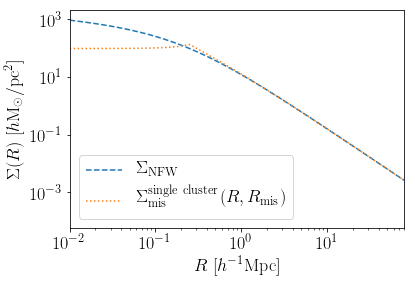

In [6]:
Sigma_mis_single  = ct.miscentering.Sigma_mis_single_at_R(Rp, Rp, Sigma_nfw, Mass, 
                                                          conc, Omega_m, Rmis)
plt.loglog(Rp, Sigma_nfw, ls="--", label=r"$\Sigma_{\rm NFW}$")
plt.loglog(Rp, Sigma_mis_single, ls=":", label=r"$\Sigma_{\rm mis}^{\rm single\ cluster}(R,R_{\rm mis})$")
plt.legend(loc = 0)
plt.xlabel(r"$R\ [h^{-1}{\rm Mpc}]$")
plt.ylabel(r"$\Sigma(R)\ [h{\rm M_\odot}/{\rm pc}^2]$")
plt.xlim(0.01, 80)
#plt.savefig("fig1.png", figsize=(6,6), dpi=300, bbox_inches='tight')

# Effect on $\Delta\Sigma$
$\Sigma$ is proportional to the magnification but $\Delta\Sigma$, the differential surface mass density, is the quantity that is proportional to tangential shear.

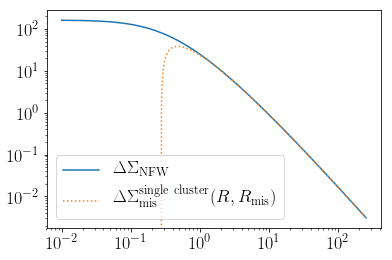

In [7]:
DeltaSigma_nfw = ct.deltasigma.DeltaSigma_at_R(Rp, Rp, Sigma_nfw, Mass, conc, Omega_m)
DeltaSigma_single = ct.miscentering.DeltaSigma_mis_at_R(Rp, Rp, Sigma_mis_single)
plt.loglog(Rp, DeltaSigma_nfw, ls="-", label=r"$\Delta\Sigma_{\rm NFW}$")
plt.loglog(Rp, DeltaSigma_single, ls=":", 
           label=r"$\Delta\Sigma_{\rm mis}^{\rm single\ cluster}(R,R_{\rm mis})$")
plt.legend(loc=0)

# Miscentering on stacks
In a stack of clusters, the clusters are all miscentered by different amounts. For this reason we have to convolve $\Sigma(R|R_{\rm mis})$ with some kernel describing the distribution of $R_{\rm mis}$.
$$
\Sigma_{\rm mis}(R) = \int dR_{\rm mis}P(R_{\rm mis}) \Sigma(R|R_{\rm mis}).
$$
Let's pretend that $P(R_{\rm mis})$ is a 2D gaussian, which is the distribution from the SV analysis. Look at the docstrings for these functions for other options.

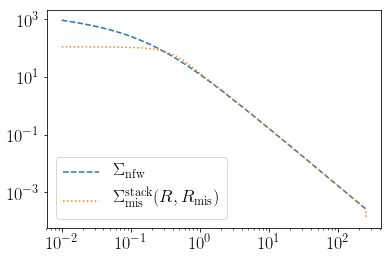

In [8]:
Sigma_mis  = ct.miscentering.Sigma_mis_at_R(Rp, Rp, Sigma_nfw, Mass, conc, Omega_m, Rmis)
plt.loglog(Rp, Sigma_nfw, ls="--", label=r"$\Sigma_{\rm nfw}$")
plt.loglog(Rp, Sigma_mis, ls=":", label=r"$\Sigma_{\rm mis}^{\rm stack}(R,R_{\rm mis})$")
plt.legend(loc = 0)

# Stack of $\Delta\Sigma$s
Again, $\Delta\Sigma$ is the quantity proportional to tangential shear, so the affect on those stacks is seen here.

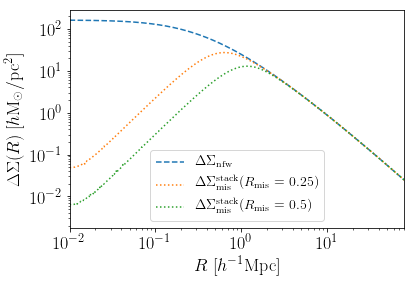

In [9]:
Sigma_mis = ct.miscentering.Sigma_mis_at_R(Rp, Rp, Sigma_nfw, Mass, conc, Omega_m, Rmis)
Sigma_mis2 = ct.miscentering.Sigma_mis_at_R(Rp, Rp, Sigma_nfw, Mass, conc, Omega_m, 0.5)
DeltaSigma_mis = ct.miscentering.DeltaSigma_mis_at_R(Rp, Rp, Sigma_mis)
DeltaSigma_mis2 = ct.miscentering.DeltaSigma_mis_at_R(Rp, Rp, Sigma_mis2)
plt.loglog(Rp, DeltaSigma_nfw, ls="--", label=r"$\Delta\Sigma_{\rm nfw}$")
plt.loglog(Rp, DeltaSigma_mis, ls=":", 
           label=r"$\Delta\Sigma_{\rm mis}^{\rm stack}(R_{\rm mis}=0.25)$")
plt.loglog(Rp, DeltaSigma_mis2, ls=":", 
           label=r"$\Delta\Sigma_{\rm mis}^{\rm stack}(R_{\rm mis}=0.5)$")
plt.legend(fontsize=14)
plt.xlabel(r"$R\ [h^{-1}{\rm Mpc}]$")
plt.ylabel(r"$\Delta\Sigma(R)\ [h{\rm M_\odot}/{\rm pc}^2]$")
plt.xlim(0.01, 80)
plt.savefig(outpath+"miscentering_length_effect.png", figsize=(6,6), dpi=300, bbox_inches='tight')

# Single cluster vs. stack
The affect of having a stack where clusters are miscentered following a distribution is compared to a single miscentered cluster is shown below.

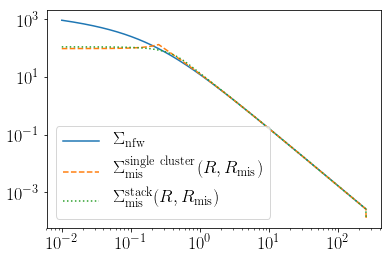

In [10]:
plt.loglog(Rp, Sigma_nfw, ls="-", label=r"$\Sigma_{\rm nfw}$")
plt.loglog(Rp, Sigma_mis_single, ls="--", 
           label=r"$\Sigma_{\rm mis}^{\rm single\ cluster}(R,R_{\rm mis})$")
plt.loglog(Rp, Sigma_mis, ls=":", 
           label=r"$\Sigma_{\rm mis}^{\rm stack}(R,R_{\rm mis})$")
plt.legend(loc = 0)

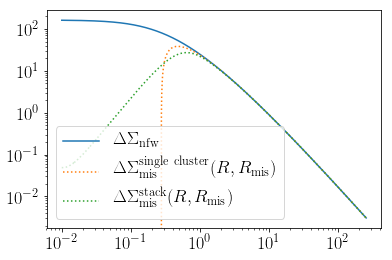

In [11]:
plt.loglog(Rp, DeltaSigma_nfw, ls="-", label=r"$\Delta\Sigma_{\rm nfw}$")
plt.loglog(Rp, DeltaSigma_single, ls=":", 
           label=r"$\Delta\Sigma_{\rm mis}^{\rm single\ cluster}(R,R_{\rm mis})$")
plt.loglog(Rp, DeltaSigma_mis, ls=":", 
           label=r"$\Delta\Sigma_{\rm mis}^{\rm stack}(R,R_{\rm mis})$")
plt.legend(loc=0)